# Eigenface for face recognition
## Loading training dataset

(540, 2500) (540,)


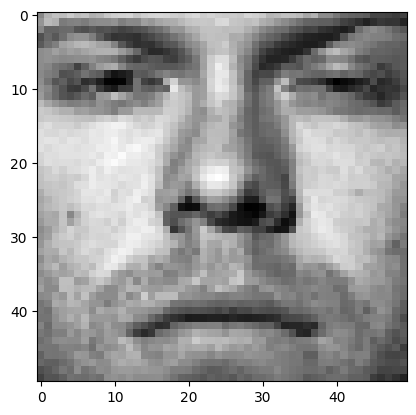

In [7]:
import numpy as np
import matplotlib.image as misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Loading testing dataset

(100, 2500) (100,)


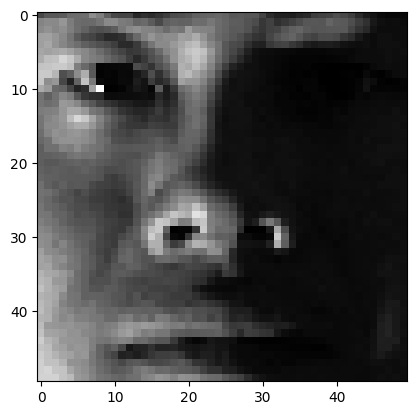

In [8]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print(test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Average Face
I computed the average of the training set by summing up the values of all rows in X and dividing by the number of faces.

In [21]:
average = np.sum(train_data, axis=0)
average /= train_data.shape[0]
print(average.shape)

(2500,)


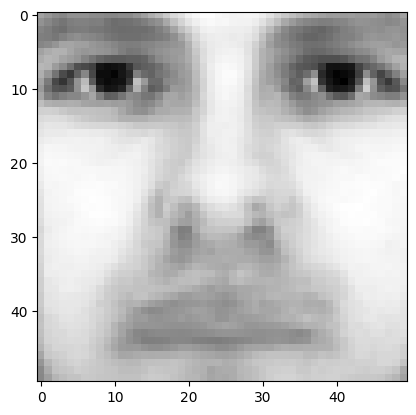

In [22]:
plt.imshow(average.reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Mean Subtraction
Taking this average face, I took each sample and subtracted the mean. For both the training and test set. Note that the average face was computed from only the training set (and we use the same average face for both training and test sets).

In [23]:
train_data_subtracted = train_data - average
test_data_subtracted = test_data - average

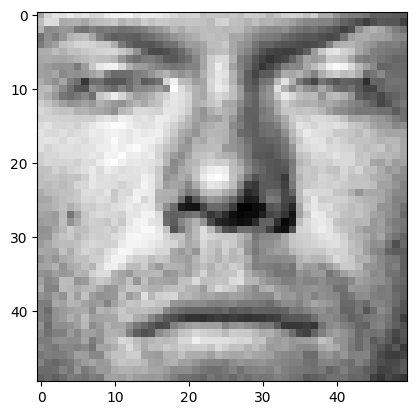

In [24]:
# train sample 10 with mean subtraction
plt.imshow(train_data_subtracted[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()

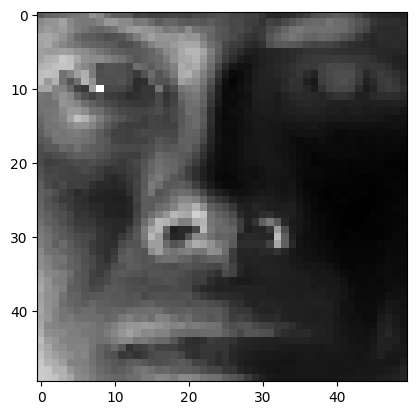

In [26]:
# test sample 10 with mean subtraction
plt.imshow(test_data_subtracted[10].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Eigenface
I performed the eigendecomposition on each XTX to get the eigenvectors of the sample. I used the original test/train dataset, not the one from the mean subtraction.

In [33]:
def decompose_eigen(single_image):
    X = single_image.reshape(50,50)
    A = X.T @ X
    eigvals, eigvecs = np.linalg.eig(A)
    return eigvecs

In [35]:
train_eigenvecs = np.apply_along_axis(decompose_eigen, axis=1, arr=train_data)
test_eigenvecs = np.apply_along_axis(decompose_eigen, axis=1, arr=test_data)

In [36]:
train_eigenvecs.shape

(540, 50, 50)

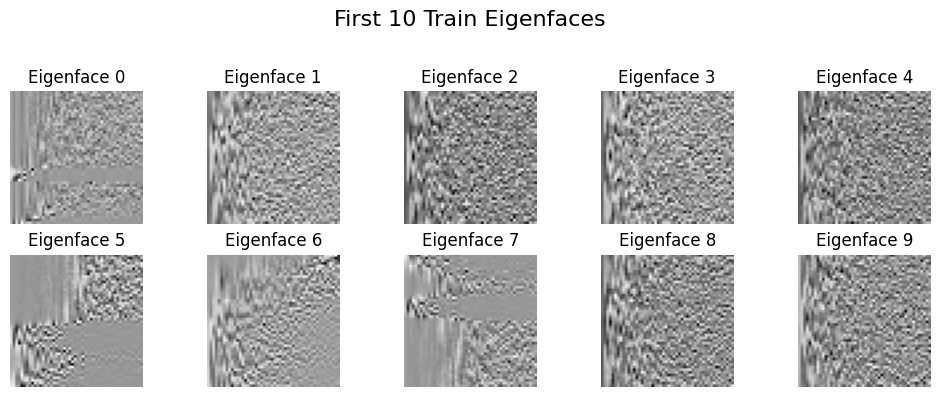

In [45]:
# Visualize some train eigenfaces
# Code adapted from ChatGPT (OpenAI 2025)
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 5, figsize=(10, 4))   # 2 rows × 5 columns

for i, ax in enumerate(axes.flat):
    img = train_eigenvecs[i].reshape(50, 50)
    ax.imshow(img, cmap=cm.Greys_r)
    ax.set_title(f"Eigenface {i}")
    ax.axis('off')   # remove axes ticks

fig.suptitle("First 10 Train Eigenfaces", fontsize=16)  # <-- ADD TITLE HERE

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

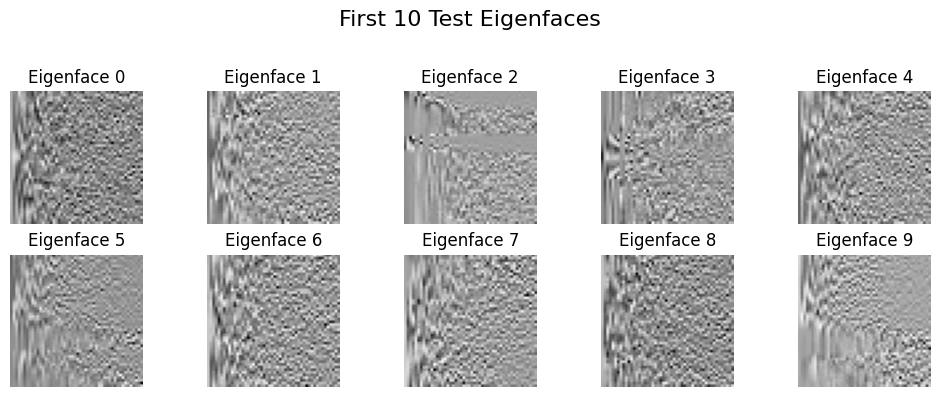

In [46]:
# Visualize some train eigenfaces
# Code adapted from ChatGPT (OpenAI 2025)
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, axes = plt.subplots(2, 5, figsize=(10, 4))   # 2 rows × 5 columns

for i, ax in enumerate(axes.flat):
    img = test_eigenvecs[i].reshape(50, 50)
    ax.imshow(img, cmap=cm.Greys_r)
    ax.set_title(f"Eigenface {i}")
    ax.axis('off')   # remove axes ticks

fig.suptitle("First 10 Test Eigenfaces", fontsize=16)  # <-- ADD TITLE HERE

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()